<a href="https://colab.research.google.com/github/MarthaHT/CursoPytorch/blob/main/Perceptron1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles

# Generate Data for a Simple Classification Problem

In [ ]:
# Use Sklearn to generate a random toy dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=2.0, random_state=1)

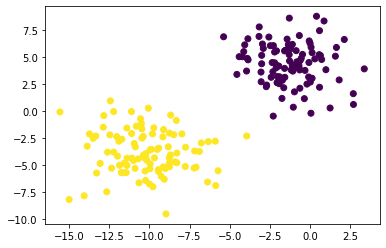

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

# Train a Perceptron using Sklearn

In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Adding decision boundary to plot
x1 = np.arange(-16, 5, 0.1)
x2 = np.arange(-11, 9, 0.1)
Z = np.zeros((len(x1),len(x2)))

for i in range(len(x1)):
    for j in range(len(x2)):
        Z[i,j] = clf.predict(np.array([x1[i], x2[j]]).reshape(1, -1))

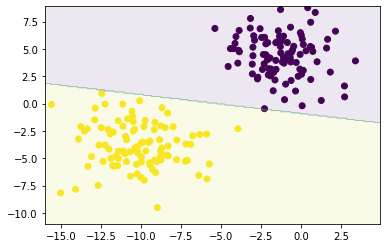

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.contourf(x1,x2,Z.T, alpha=0.1)

In [ ]:
clf.coef_

array([[ -2.08366462, -12.02578073]])

In [ ]:
clf.intercept_

array([-11.])

# Train a Perceptron from Scratch

In [ ]:
def threshold_function(x, w, b):
    activation = x.T.dot(w) + b 
    return 1.0 if activation >= 0.0 else 0.0

In [ ]:
# Init weights
w = np.array([0,0])
b = 0

In [ ]:
# Learn weights
for iters in range(5000):
    k = np.random.choice(range(len(y)), 1)[0] # select a random example
    y_pred = threshold_function(X[k], w, b) # predict the kth example
    w = w + 0.0001 * (y[k] - y_pred) * X[k]  # Update the weights
    b = b + 0.0001 * (y[k] - y_pred) * 1  # Update the intercept

In [ ]:
# Adding decision boundary to plot
x1 = np.arange(-16, 5, 0.1)
x2 = np.arange(-11, 9, 0.1)
Z = np.zeros((len(x1),len(x2)))

for i in range(len(x1)):
    for j in range(len(x2)):
        Z[i,j] = threshold_function(np.array([x1[i], x2[j]]), w, b)

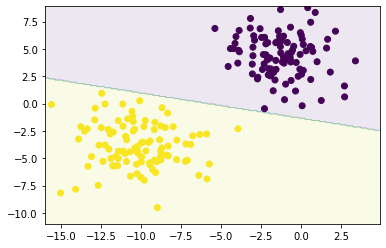

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.contourf(x1, x2, Z.T, alpha=0.1)

# Perceptrons are only capable of learning linearly separable patterns

In [ ]:
# Use Sklearn to generate a random toy dataset
X, y = make_circles(n_samples=300, factor=0.7, noise=0.02, random_state=1)

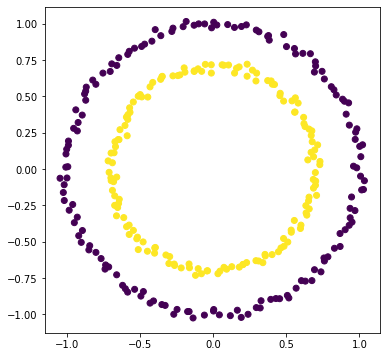

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
clf = Perceptron(tol=1e-3, random_state=3)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=3, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Adding decision boundary to plot
x1 = np.arange(-1.1, 1.1, 0.01)
x2 = np.arange(-1.1, 1.1, 0.01)
Z = np.zeros((len(x1),len(x2)))

for i in range(len(x1)):
    for j in range(len(x2)):
        Z[i,j] = clf.predict(np.array([x1[i], x2[j]]).reshape(1, -1))

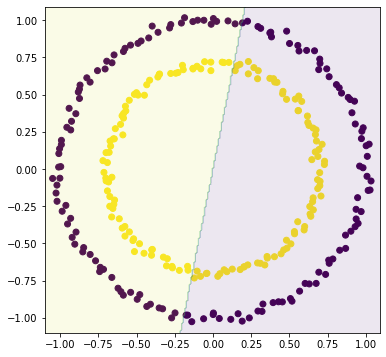

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.contourf(x1, x2,Z.T, alpha=0.1)